Dataset has car sell prices for 3 different models. Build a model that can predict prices

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("datasets/carprices.csv");
df.head(10)

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


# Ploting scatter to check if linear regression is applicable

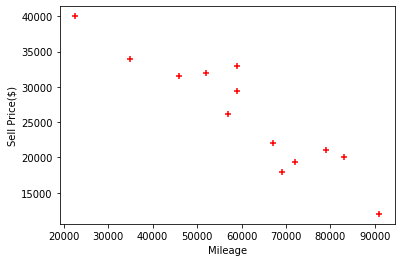

In [7]:
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.scatter(df.Mileage,df['Sell Price($)'],color='red',marker='+')

# Using pandas to create dummy variables

In [12]:
dummies = pd.get_dummies(df['Car Model'])
dummies.head(10)

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [13]:
merged = pd.concat([df,dummies],axis='columns')
merged.head(10)

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [14]:
final = merged.drop(["Car Model","Mercedez Benz C class"],axis='columns')
final.head(10)

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [15]:
X = final.drop('Sell Price($)',axis='columns')
X.head(10)

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [16]:
y = final['Sell Price($)']
y.head(10)

0    18000
1    34000
2    26100
3    40000
4    31500
5    29400
6    32000
7    19300
8    12000
9    22000
Name: Sell Price($), dtype: int64

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [20]:
model.score(X,y)

0.9417050937281082

# Price of mercedez benz that is 4 yr old with mileage 45000

In [21]:
model.predict([[45000,4,0,0]])

array([36991.31721061])

# Price of BMW X5 that is 7 yr old with mileage 86000

In [22]:
model.predict([[86000,7,0,1]])

array([11080.74313219])